In [1]:
!pip install segment_anything
!pip install opencv-python

import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
torch.cuda.empty_cache() 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 26.8 MB/s eta 0:00:0000:0100:01


In [2]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device);


In [3]:
folder = '/home/jovyan/work/data/leaves_cropped/'
folder_out = '/home/jovyan/work/data/leaf_only_sam/npz2/'

imnames = [x for x in os.listdir(folder) if (x.endswith('.JPG') and not x.endswith('_full.JPG'))]  # get list of image files change .JPG is using files of different type
print(imnames)

['IMG_6151_cropped.JPG', 'IMG_6146_cropped.JPG', 'IMG_5963_cropped.JPG', 'IMG_6167_cropped.JPG', 'IMG_6007_cropped.JPG', 'IMG_6148_cropped.JPG', 'IMG_6165_cropped.JPG', 'IMG_6018_cropped.JPG', 'IMG_5944_cropped.JPG', 'IMG_5872_cropped.JPG', 'IMG_5866_cropped.JPG', 'IMG_5986_cropped.JPG', 'IMG_5948_cropped.JPG', 'IMG_5932_cropped.JPG', 'IMG_5949_cropped.JPG', 'IMG_6008_cropped.JPG', 'IMG_6020_cropped.JPG', 'IMG_6622_cropped.JPG', 'IMG_5916_cropped.JPG', 'IMG_6050_cropped.JPG', 'IMG_5990_cropped.JPG', 'IMG_5915_cropped.JPG', 'IMG_6046_cropped.JPG', 'IMG_6032_cropped.JPG', 'IMG_6145_cropped.JPG', 'IMG_5974_cropped.JPG', 'IMG_5853_cropped.JPG', 'IMG_5966_cropped.JPG', 'IMG_5940_cropped.JPG', 'IMG_6159_cropped.JPG', 'IMG_5852_cropped.JPG', 'IMG_6152_cropped.JPG', 'IMG_5871_cropped.JPG', 'IMG_5942_cropped.JPG', 'IMG_6029_cropped.JPG', 'IMG_5855_cropped.JPG', 'IMG_6144_cropped.JPG', 'IMG_6052_cropped.JPG', 'IMG_6154_cropped.JPG', 'IMG_5973_cropped.JPG', 'IMG_5968_cropped.JPG', 'IMG_6038_cropp

In [4]:
import os
import cv2
import torch
import numpy as np
from segment_anything import SamAutomaticMaskGenerator  # Import SAM appropriately

# Set the PYTORCH_CUDA_ALLOC_CONF environment variable
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:128'

for imname in imnames:
    print(imname)
    image = cv2.imread(folder + imname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image = cv2.resize(image, None, fx=0.5, fy=0.5)  # Adjust scale factors as needed
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
           
    # use crop_n_layer=1 to improve results on smallest leaves 
    mask_generator = SamAutomaticMaskGenerator(
        model=sam,
        points_per_side=32,
        pred_iou_thresh=0.88,
        stability_score_thresh=0.95,
        crop_n_layers=1,
        crop_n_points_downscale_factor=2,
        min_mask_region_area=400,  
    )

    # get masks
    masks = mask_generator.generate(image)
    
    # Save results at each step as npz file 
    np.savez(folder_out + imname.replace('.JPG','leafonly_allmasks.npz'), masks)
    
    # Clear CUDA cache to free memory
    torch.cuda.empty_cache()


IMG_6151_cropped.JPG
IMG_6146_cropped.JPG
IMG_5963_cropped.JPG
IMG_6167_cropped.JPG
IMG_6007_cropped.JPG
IMG_6148_cropped.JPG
IMG_6165_cropped.JPG
IMG_6018_cropped.JPG
IMG_5944_cropped.JPG
IMG_5872_cropped.JPG
IMG_5866_cropped.JPG
IMG_5986_cropped.JPG
IMG_5948_cropped.JPG
IMG_5932_cropped.JPG
IMG_5949_cropped.JPG
IMG_6008_cropped.JPG
IMG_6020_cropped.JPG
IMG_6622_cropped.JPG
IMG_5916_cropped.JPG
IMG_6050_cropped.JPG
IMG_5990_cropped.JPG
IMG_5915_cropped.JPG
IMG_6046_cropped.JPG
IMG_6032_cropped.JPG
IMG_6145_cropped.JPG
IMG_5974_cropped.JPG
IMG_5853_cropped.JPG
IMG_5966_cropped.JPG
IMG_5940_cropped.JPG
IMG_6159_cropped.JPG
IMG_5852_cropped.JPG
IMG_6152_cropped.JPG
IMG_5871_cropped.JPG
IMG_5942_cropped.JPG
IMG_6029_cropped.JPG
IMG_5855_cropped.JPG
IMG_6144_cropped.JPG
IMG_6052_cropped.JPG
IMG_6154_cropped.JPG
IMG_5973_cropped.JPG
IMG_5968_cropped.JPG
IMG_6038_cropped.JPG
IMG_6033_cropped.JPG
IMG_5920_cropped.JPG
IMG_6160_cropped.JPG
IMG_5877_cropped.JPG
IMG_6054_cropped.JPG
IMG_5927_crop

[ True  True False False False False False False  True  True False False
 False False  True False  True  True False False  True False False False
 False False  True False False  True False False False False False  True
 False False  True False False False False False  True]
{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 236956, 'bbox': [1453, 862, 526, 808], 'predicted_iou': 1.004578709602356, 'point_coords': [[1811.71875, 1376.90625]], 'stability_score': 0.9770275950431824, 'crop_box': [0, 0, 2319, 2319]}
{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..

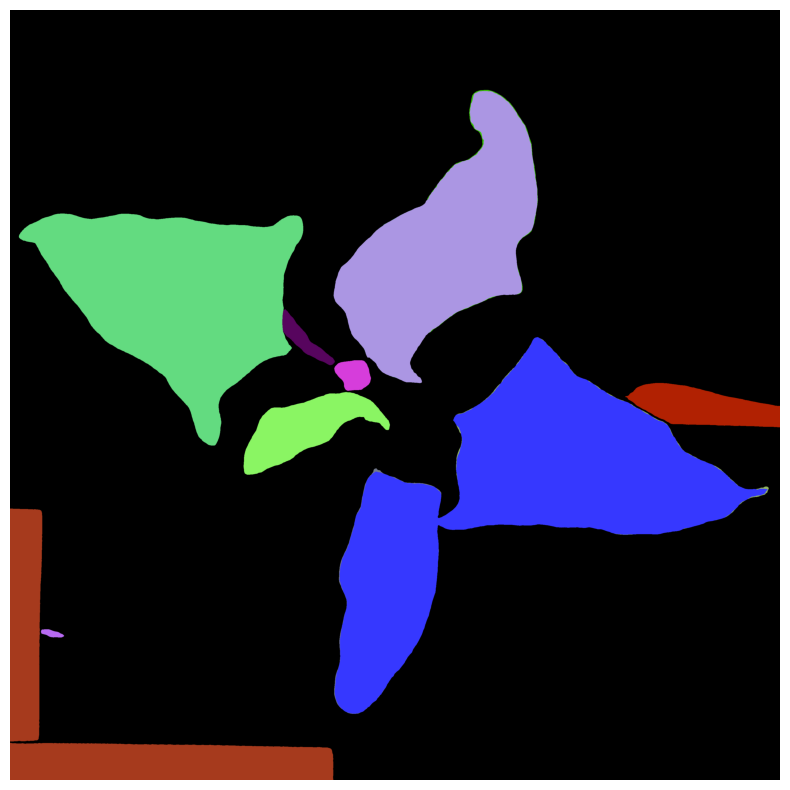

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage import color
import random

def generate_unique_color(existing_colors):
    """
    Generate a unique random color that's not in existing_colors.
    """
    while True:
        new_color = [random.randint(0, 255) for _ in range(3)]
        if not any((np.array(new_color) == x).all() for x in existing_colors):
            return new_color

# Load the .npz file with allow_pickle=True
image_name = 'IMG_5956'
mask_data = np.load(folder_out + image_name + 'leafonly_allmasks.npz', allow_pickle=True)

# Specify the path to your image
image_path = folder + image_name + '.JPG'

# Load the image
image = mpimg.imread(image_path)

# Prepare a canvas with the same dimensions as the image but all zeros (black)
overlay = np.zeros_like(image)

# Store used colors to ensure uniqueness
used_colors = []


all_masks = mask_data['arr_0']
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
idx_green = checkcolour(all_masks, hsv)
print(idx_green)
masks_g = []
for idx, use in enumerate(idx_green):
    if use:
        masks_g.append(all_masks[idx])


# Loop through each mask
for i, mask in enumerate(masks_g):
    print(mask)
    segmentation_info = mask
    segmentation_mask = segmentation_info['segmentation']
    
    # Resize the mask to match the image's dimensions
    # resized_mask = cv2.resize(segmentation_mask.astype(float), (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
    # resized_mask = resized_mask > 0.5  # Make sure the mask is binary

    # Generate a unique color for this mask
    unique_color = generate_unique_color(used_colors)
    used_colors.append(unique_color)
    
    # Apply the color to the overlay where the mask is true
    overlay[segmentation_mask] = unique_color

# Blend the original image and the overlay
# Convert overlay to float and scale from 0 to 1 for blending
overlay_float = overlay.astype(np.float64) / 255
image_float = image.astype(np.float64) / 255
blended_image = (overlay_float + image_float) / 2

# Display the blended image
plt.figure(figsize=(10, 10))
plt.imshow(overlay)
plt.axis('off')
plt.show()


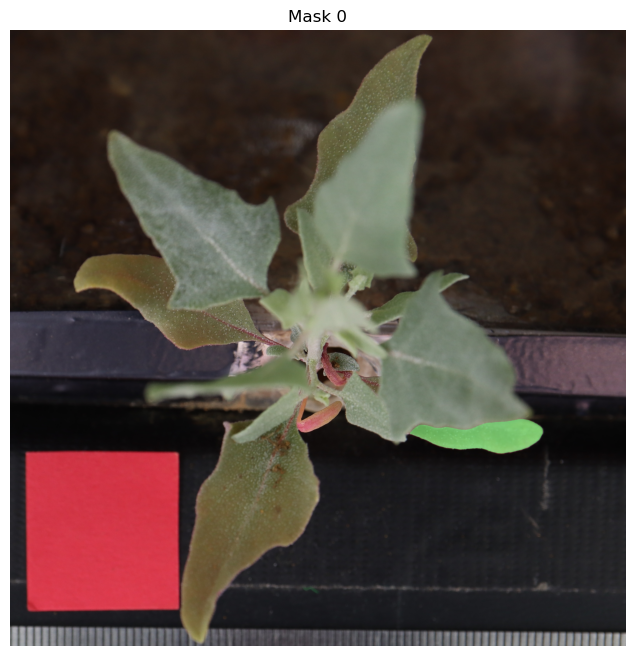

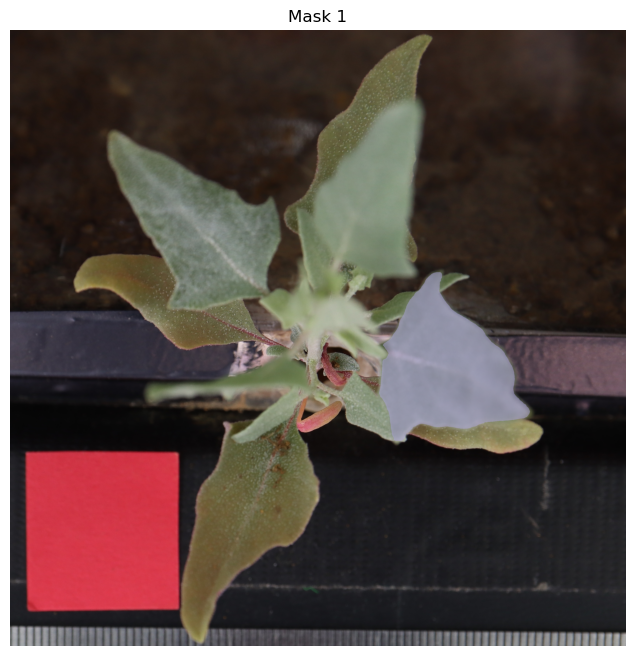

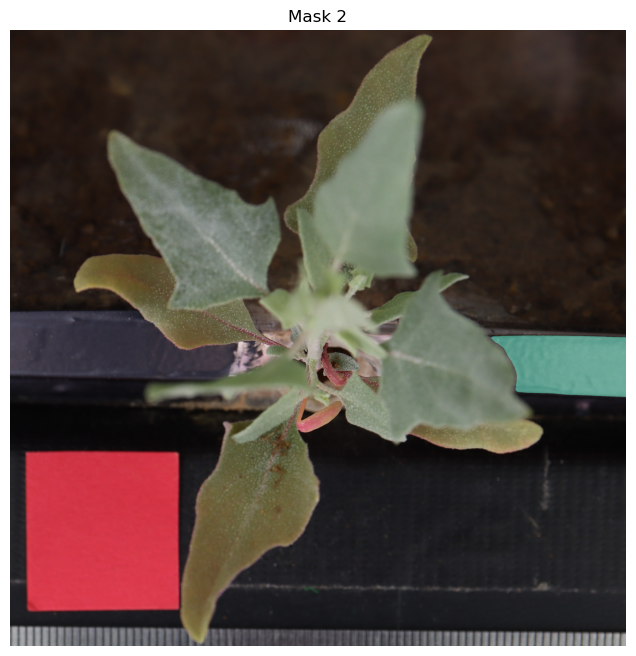

KeyboardInterrupt: 

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# # Load the .npz file with allow_pickle=True
# mask_data = np.load('./cropped_results/IMG_6042leafonly_allmasks.npz', allow_pickle=True)

# # Specify the path to your image
# image_path = './cropped_leaves/IMG_6042.JPG'

# # Load the .npz file with allow_pickle=True
# image_name = 'IMG_5794'
# mask_data = np.load(folder_out + image_name + 'leafonly_allmasks.npz', allow_pickle=True)

# # Specify the path to your image
# image_path = folder + image_name + '.JPG'


# # Load the image
# image = mpimg.imread(image_path)

def apply_mask_to_image(image, mask):
    """
    Apply a single mask to the image, creating a colored overlay
    """
    # Create an overlay that is a copy of the original image
    overlay = image.copy()
    
    # Generate a random color for the mask
    color = np.array([random.randint(0, 255) for _ in range(3)], dtype=np.uint8)
    
    # Resize mask to match image dimensions
    resized_mask = cv2.resize(mask.astype(float), (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
    resized_mask = resized_mask > 0.5  # Ensure binary mask
    
    # Apply the color to the overlay where the mask is true
    overlay[resized_mask] = overlay[resized_mask] * 0.5 + color * 0.5
    
    return overlay

# Iterate through each mask and display it with the original image
for i, mask in enumerate(mask_data['arr_1  ']):
    segmentation_info = mask
    segmentation_mask = segmentation_info['segmentation']
    
    # Apply the current mask to the image
    masked_image = apply_mask_to_image(image, segmentation_mask)
    
    # Display the image with the current mask applied
    plt.figure(figsize=(8, 8))
    plt.imshow(masked_image)
    plt.title(f'Mask {i}')
    plt.axis('off')
    plt.show()


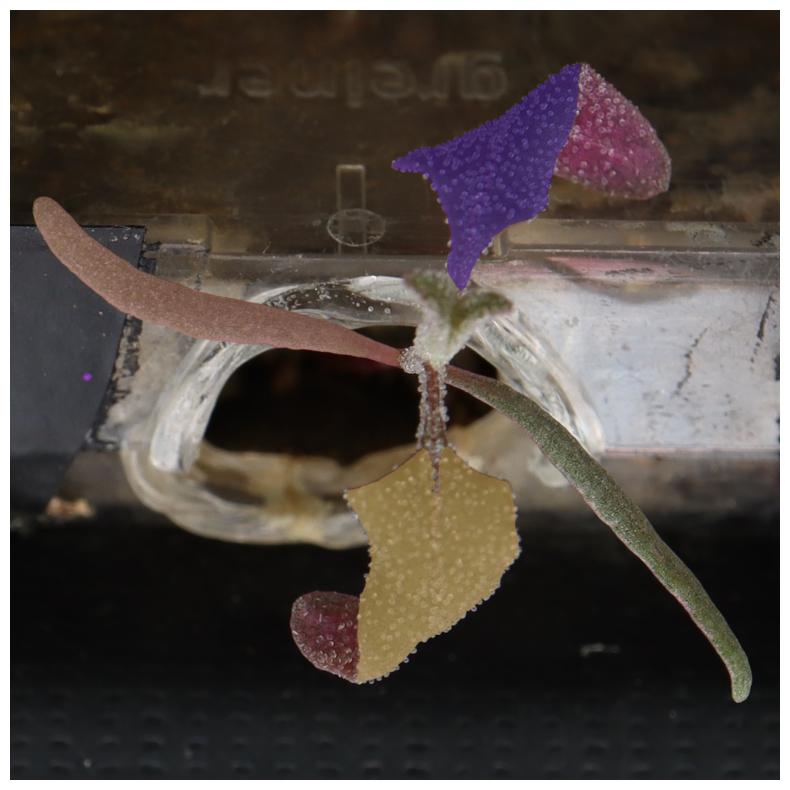

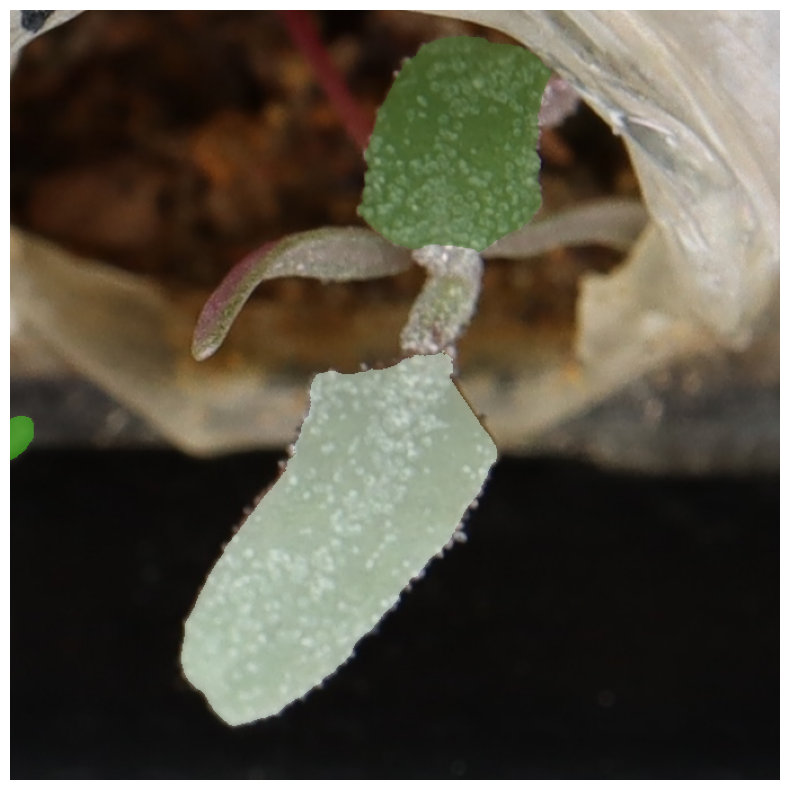

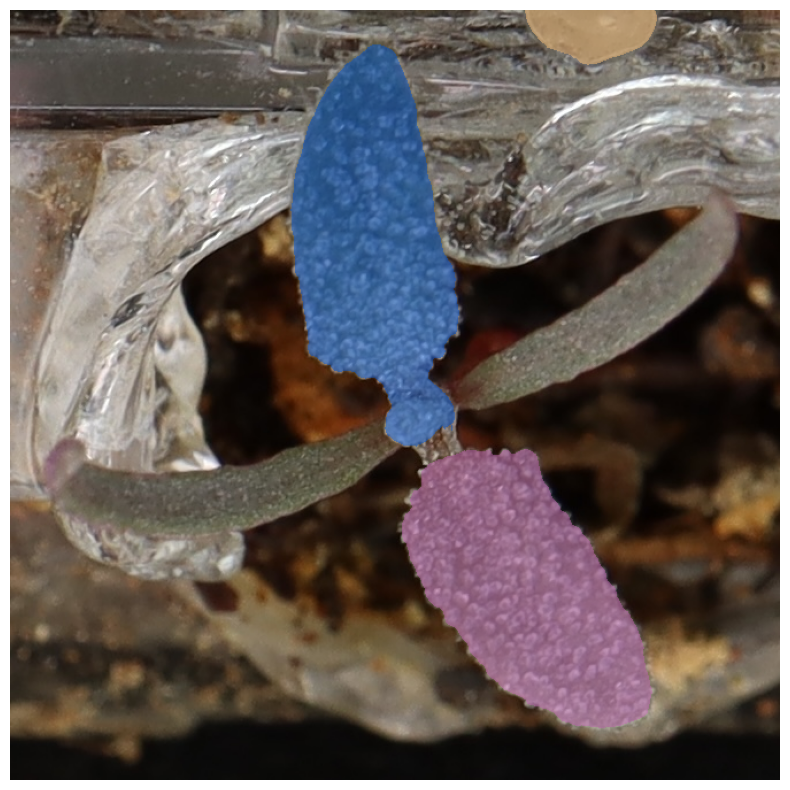

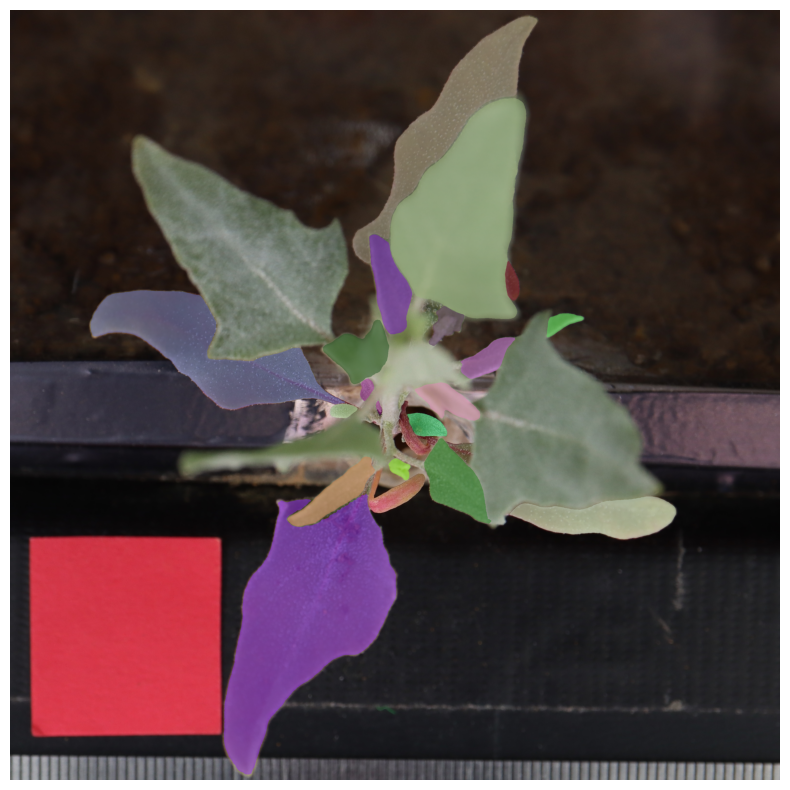

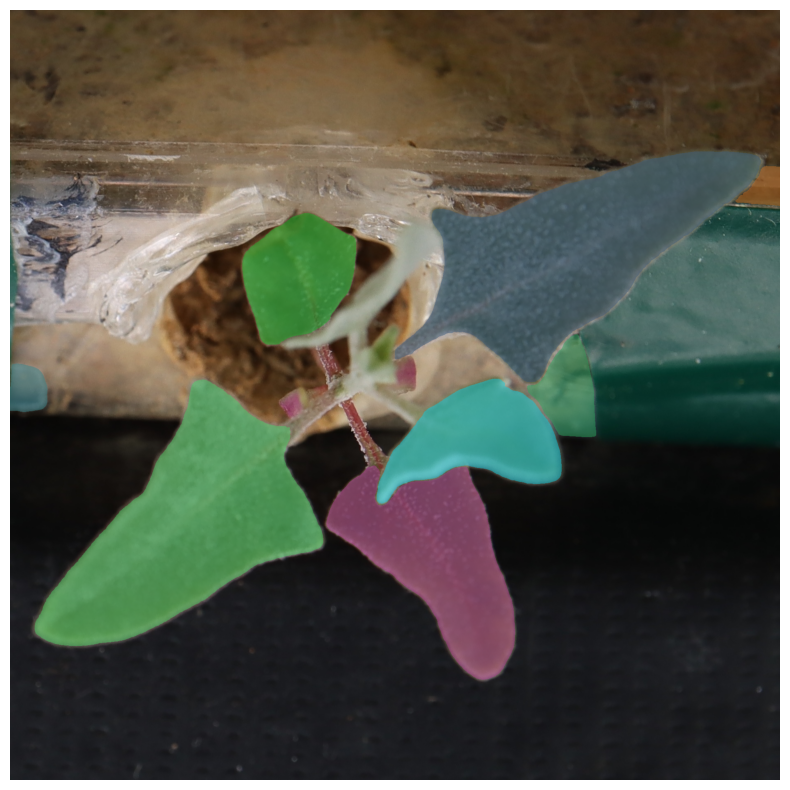

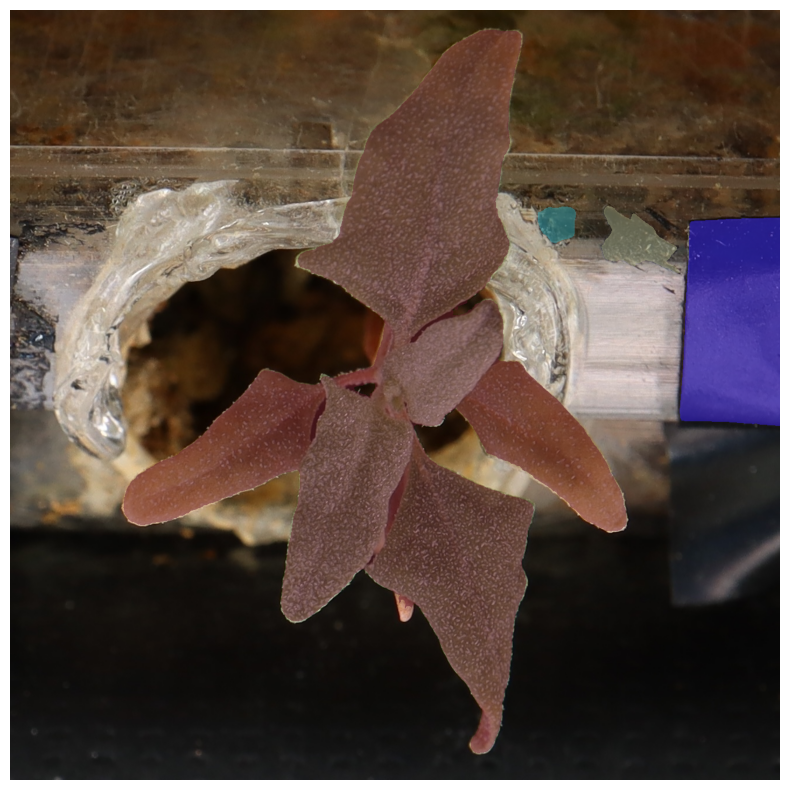

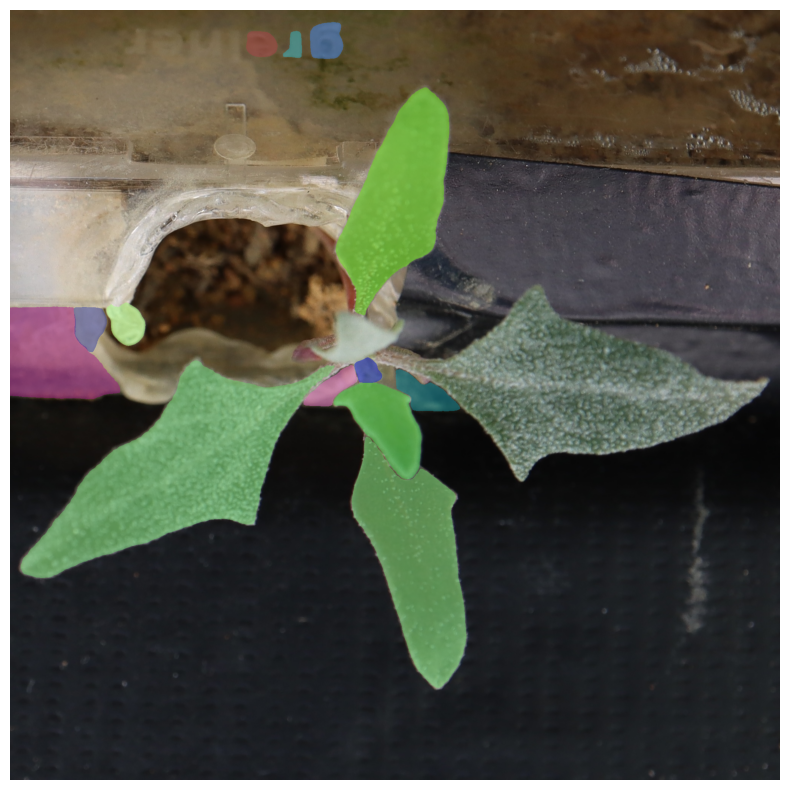

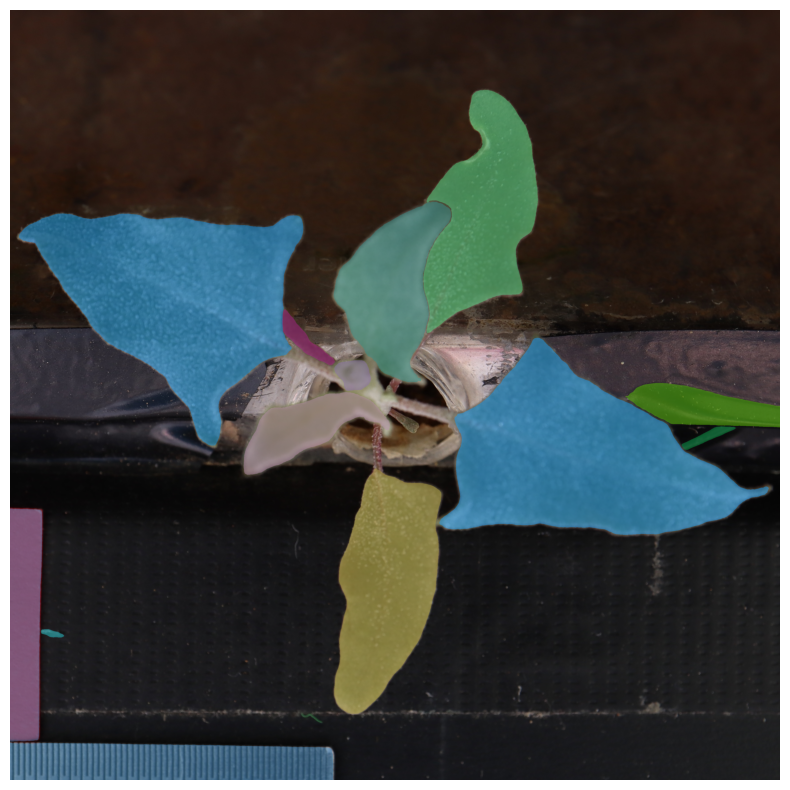

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage import color
import random

def generate_unique_color(existing_colors):
    """
    Generate a unique random color that's not in existing_colors.
    """
    while True:
        new_color = [random.randint(0, 255) for _ in range(3)]
        if not any((np.array(new_color) == x).all() for x in existing_colors):
            return new_color

results = [x for x in os.listdir(folder_out) if x.startswith('IMG')] 

for result_file in results:
    # Load the .npz file with allow_pickle=True
    mask_data = np.load(folder_out + result_file, allow_pickle=True)

    # Specify the path to your image
    filename_without_extension = result_file[:-21] + '.JPG'
    
    image_path = folder + filename_without_extension

    # Load the image
    image = mpimg.imread(image_path)

    # Prepare a canvas with the same dimensions as the image but all zeros (black)
    overlay = np.zeros_like(image)

    # Store used colors to ensure uniqueness
    used_colors = []

    # Loop through each mask
    
    masked_image = image


    for i, mask in enumerate(mask_data['arr_4']):
        segmentation_info = mask
        segmentation_mask = segmentation_info['segmentation']

        # Resize the mask to match the image's dimensions
        resized_mask = cv2.resize(segmentation_mask.astype(float), (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
        resized_mask = resized_mask > 0.5  # Make sure the mask is binary

        # Generate a unique color for this mask
        unique_color = generate_unique_color(used_colors)
        used_colors.append(unique_color)

        # Apply the color to the overlay where the mask is true
        overlay[resized_mask] = unique_color
        masked_image = apply_mask_to_image(masked_image, segmentation_mask)

    # Display the blended image
    plt.figure(figsize=(10, 10))
    plt.imshow(masked_image)
    plt.axis('off')
    plt.show()